# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [39]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [40]:
from tensorflow import keras
print(keras.__version__)

2.4.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [41]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [42]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

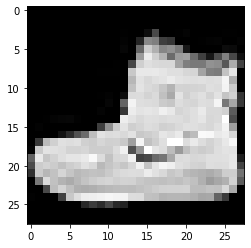

In [43]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [44]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

### Respuesta Pregunta 1

#### Una hidden layer de tamaños 128, utilizando unidades sigmoid y la última capa debe de ser una capa softmax ####

In [45]:
model= keras.models.Sequential()
#convoluciones
model.add(keras.layers.Flatten(input_shape=[28,28]))     ## 28x28 pixeles de la imagen 
#fully connected
#Una hidden layer de tamaños 128 y utilizando unidades sigmoid  
model.add(keras.layers.Dense(128, activation="sigmoid"))
### La última capa debe de ser una capa softmax
model.add(keras.layers.Dense(10, activation="softmax")) 

#### Optimizador ADAM ####

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "Adam",
              metrics =["accuracy"])

#### La red debe entrenar durante 10 epochs y batch size de 64 ####

In [47]:
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)
# validation_split = 0.2)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.8359 - accuracy: 0.7334
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4246 - accuracy: 0.8491
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3820 - accuracy: 0.8643
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3527 - accuracy: 0.8733
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3407 - accuracy: 0.8784
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3224 - accuracy: 0.8830
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3024 - accuracy: 0.8903
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2952 - accuracy: 0.8920
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2840 - accuracy: 0.8969
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2734 - accuracy: 0.8993

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

### Respuesta pregunta 2

#### Evaluamos el modelo ####

In [48]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8750


[0.3422394394874573, 0.875]

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [49]:
### Tu código del clasificador de la pregunta 3 aquí ###

classifications = model.predict(test_images)
print(classifications[0])

[6.9922912e-06 7.3951941e-07 8.7081071e-06 5.4266275e-06 7.4441068e-06 8.5404441e-03 2.1756019e-05 5.3267058e-02 3.1776293e-04 9.3782371e-01]


In [50]:
np.argmax(classifications[0])

9

Tu respuesta a la pregunta 3.1 aquí: la predicción se realiza sobre las 10 clases del arreglo o variable (0 a 9), este nuemero representa la probabilidad de que salga ese elemento en la predicción. Por lo que el 0 es el elemento del arreglo clasiffication con mejor probabilidad. 

Tu respuesta a la pregunta 3.2 aquí: En este caso el 9

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

**Respuesta pregunta 4.1. Código para 512 neuronas**

In [51]:
### Tu código para 512 neuronas aquí ###

model= keras.models.Sequential()
#convoluciones
model.add(keras.layers.Flatten(input_shape=[28,28]))     ## 28x28 pixeles de la imagen 
#fully connected
#Una hidden layer de tamaños 512 y utilizando unidades sigmoid  
model.add(keras.layers.Dense(512, activation="sigmoid"))
### La última capa debe de ser una capa softmax
model.add(keras.layers.Dense(10, activation="softmax")) 

In [52]:
#Optimizador Adam.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "Adam",
              metrics =["accuracy"])

In [53]:
# La red debe entrenar durante 10 epochs y batch size de 64.
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.6842 - accuracy: 0.7680
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.4089 - accuracy: 0.8545
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3671 - accuracy: 0.8686
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3397 - accuracy: 0.8769
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3186 - accuracy: 0.8834
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3027 - accuracy: 0.8909
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2841 - accuracy: 0.8955
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2757 - accuracy: 0.8976
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2569 - accuracy: 0.9049
Epoch 10/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2477 - accuracy: 0.9080

In [54]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8770


[0.34313493967056274, 0.8769999742507935]

In [55]:
classifications = model.predict(test_images)

In [56]:
np.argmax(classifications[0])

9

**Respuesta pregunta 4.2. Código para 1024 neuronas**

In [57]:
### Tu código para 1024 neuronas aquí ###

model= keras.models.Sequential()
#convoluciones
model.add(keras.layers.Flatten(input_shape=[28,28]))     ## 28x28 pixeles de la imagen 
#fully connected
#Una hidden layer de tamaños 1024 y utilizando unidades sigmoid  
model.add(keras.layers.Dense(1024, activation="sigmoid"))
### La última capa debe de ser una capa softmax
model.add(keras.layers.Dense(10, activation="softmax")) 

In [58]:
#Optimizador Adam.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "Adam",
              metrics =["accuracy"])

In [59]:
# La red debe entrenar durante 10 epochs y batch size de 64.
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.6608 - accuracy: 0.7705
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4181 - accuracy: 0.8490
Epoch 3/10
938/938 [==============================] - 11s 11ms/step - loss: 0.3704 - accuracy: 0.8642
Epoch 4/10
938/938 [==============================] - 11s 11ms/step - loss: 0.3370 - accuracy: 0.8763
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3192 - accuracy: 0.8821
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2924 - accuracy: 0.8932
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2776 - accuracy: 0.8959
Epoch 8/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2589 - accuracy: 0.9030
Epoch 9/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2477 - accuracy: 0.9078
Epoch 10/10
938/938 [==============================] - 12s 12ms/step - loss: 0.241

In [60]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3259 - accuracy: 0.8869


[0.32590293884277344, 0.886900007724762]

Tu respuesta a la pregunta 4.3 aquí:
El tiempo de entrenamiento aumenta proporciolmente por epoc al aumento de las neuronas. El nivel de accuracy tanto entrenamiento y validación, mejoraron, al igual que el loss que disminuye en ambos casos. 

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [61]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications = model.predict(test_images)
print(classifications[0])
np.argmax(classifications[0])

[6.7931190e-08 1.4787577e-08 2.1741659e-08 2.5412708e-08 1.2370982e-07 9.1559824e-04 7.3795911e-07 7.9340544e-03 3.4849015e-07 9.9114895e-01]


9

Tu respuesta a la pregunta 5.1 aquí: tanto en 512 y 1024 clasifica como la mejor probabilidad a la imagen de la categoria 9. 

Tu respuesta a la pregunta 5.2 aquí: la capacidad de aprendisaje respecto a las imagenes es proporcional al aumento de las neuronas, pen este caso al accuracy aumenta de 128 a 512, pero se frena o baja lijeramente si subimos a 1024, probablemente generarndo una situación de overfitting.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



**Código pregunta 6 :**

In [62]:
model= keras.models.Sequential()

#fully connected
#Una hidden layer de tamaños 128 y utilizando unidades sigmoid  
model.add(keras.layers.Dense(128, activation="sigmoid"))
### La última capa debe de ser una capa softmax
model.add(keras.layers.Dense(10, activation="softmax")) 

In [63]:
#Optimizador Adam.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "Adam",
              metrics =["accuracy"])

In [64]:
# La red debe entrenar durante 10 epochs y batch size de 64.
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10


InvalidArgumentError:  assertion failed: [Condition x == y did not hold element-wise:] [x (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/Shape_1:0) = ] [64 1] [y (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/strided_slice:0) = ] [64 28]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert (defined at <ipython-input-64-32a284d810e3>:2) ]] [Op:__inference_train_function_219848]

Function call stack:
train_function


Tu respuesta a la pregunta 6 aquí: El array de imagenes es bidimencional (28x28) y al no ser aplanado por la capa flaten y onvertirla en un vector (de una dimención),  la capa dense que espera recibir un vertor (unidoimencional 28 filas) falla, generando el error.

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [65]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model= keras.models.Sequential()
#convoluciones
model.add(keras.layers.Flatten(input_shape=[28,28]))     ## 28x28 pixeles de la imagen 
#fully connected
#Una hidden layer de tamaños 128 y utilizando unidades sigmoid  
model.add(keras.layers.Dense(128, activation="sigmoid"))
### La última capa debe de ser una capa softmax
model.add(keras.layers.Dense(5, activation="softmax")) 

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "Adam",
              metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 0 1 8 4 4 3 6 0 4 3 0 5 1 5 8 2 4 9 3 2 1 3 5 3 4 8 2 4 5 9 3 6 9 4 9 6 5 2 2 1 8 2 3 4 3 4 2 5 4 2 9 0 6 3 3 8 6 0 7 4 3 0 8 8
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-65-867c9a1795c2>:15) ]] [Op:__inference_train_function_220391]

Function call stack:
train_function


Tu respuestas a la pregunta 7.1 aquí: El dataset de imagenes esta casificado en 10 clases y analizamos cual es la probabilidad de cada imagen perteneaca a una de las 10 categorias.

Tu respuestas a la pregunta 7.2 aquí: 
Como solo hemos utilizado 5 neuronas en la capa de salida, solo categorizamos 5 imagenes, 
o sea etiquetas de 0 y 4, por lo que al intentar encontrar un valor 9, este esta fuera del rango [0,5] gener<ndo el error: Received a label value of 9 which is outside the valid range of [0, 5) 



# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

**Código para 15 epoch aquí**

In [66]:
model= keras.models.Sequential()
#convoluciones
model.add(keras.layers.Flatten(input_shape=[28,28]))     ## 28x28 pixeles de la imagen 
#fully connected
#Una hidden layer de tamaños 128 y utilizando unidades sigmoid  
model.add(keras.layers.Dense(128, activation="sigmoid"))
### La última capa debe de ser una capa softmax
model.add(keras.layers.Dense(10, activation="softmax")) 

In [67]:
#Optimizador Adam.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "Adam",
              metrics =["accuracy"])

In [68]:
# La red debe entrenar durante 10 epochs y batch size de 64.
history = model.fit(training_images, training_labels, epochs=15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.8249 - accuracy: 0.7366
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.4208 - accuracy: 0.8498
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3816 - accuracy: 0.8641
Epoch 4/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3495 - accuracy: 0.8738
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3323 - accuracy: 0.8781
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3190 - accuracy: 0.8846
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3099 - accuracy: 0.8866
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2890 - accuracy: 0.8943
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2830 - accuracy: 0.8966
Epoch 10/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2788 - accuracy: 0.8976

In [69]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8841


[0.3219134509563446, 0.8841000199317932]

**Código para 30 epoch aquí**

In [70]:
# La red debe entrenar durante 10 epochs y batch size de 64.
history = model.fit(training_images, training_labels, epochs=30, batch_size=64)

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2312 - accuracy: 0.9148
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2244 - accuracy: 0.9180
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2194 - accuracy: 0.9188
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2148 - accuracy: 0.9214
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2098 - accuracy: 0.9233
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.2045 - accuracy: 0.9255
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1985 - accuracy: 0.9283
Epoch 8/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1960 - accuracy: 0.9286
Epoch 9/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1897 - accuracy: 0.9311
Epoch 10/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1863 - accuracy: 0.9327

In [71]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.8915


[0.35162413120269775, 0.8914999961853027]

Tu respuesta a la pregunta 8.3 aquí:
A mayor epoch mayor aprendizaje. Pero llega un momento que nuestra red no puede continuar aprendiendo y comienza a generalizar, lo que se conoce como overfitting. POr eso se generan etas flusctuaciones tanto en la vcalidación como en el entrenamiento.


# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que  se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [72]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [73]:
import tensorflow as tf
print(tf.__version__)

################################################################################################################
### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
################################################################################################################

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<= 0.40):
              print("\nAlcanzado el 40% de perdida. Se cancela el entrenamiento!!")
              self.model.stop_training = True
################################################################################################################
################################################################################################################

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.4.1
Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5773 - accuracy: 0.7998
Epoch 2/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3652 - accuracy: 0.8676

Alcanzado el 40% de perdida. Se cancela el entrenamiento!!
